<h1 style="text-align: center;">Variable PERCEPCIONES</h1>

Cargamos el DataSet

In [8]:
import pandas as pd

dataset_work_3 = pd.read_csv('D:\DataSet\dataset_work_7.csv')
x = dataset_work_3.iloc[:,:-1]
y = dataset_work_3.iloc[:,-1].values
dataset_work_3.shape

(6435903, 16)

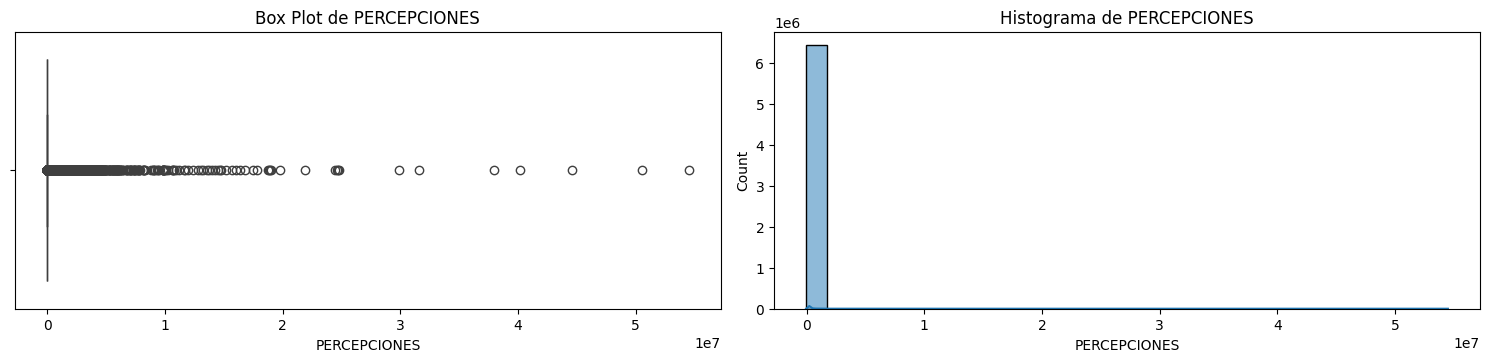

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura para contener todos los gráficos
plt.figure(figsize=(15, 10))

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2, 1)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_3['PERCEPCIONES'])
plt.title('Box Plot de PERCEPCIONES')

# Crear el histograma
plt.subplot(3, 2, 2)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_3['PERCEPCIONES'], bins=30, kde=True)
plt.title('Histograma de PERCEPCIONES')


# Ajustar el espaciado para que los gráficos no se superpongan
plt.tight_layout()

# Mostrar todos los gráficos
plt.show()

In [10]:
def calcular_estadisticas_completas(df, columna):
    # Obtener estadísticas básicas con describe()
    estadisticas = dataset_work_3[columna].describe()
    
    # Calcular estadísticas adicionales
    estadisticas['asimetria'] = df[columna].skew()
    estadisticas['curtosis'] = df[columna].kurtosis()
    estadisticas['varianza'] = df[columna].var()
    
    return estadisticas

# Llamada a la función
estadisticas_completas = calcular_estadisticas_completas(dataset_work_3, 'PERCEPCIONES')
display(estadisticas_completas)

count        6.435903e+06
mean         1.762647e+03
std          7.140159e+04
min         -4.549220e+04
25%          0.000000e+00
50%          0.000000e+00
75%          0.000000e+00
max          5.450918e+07
asimetria    3.343805e+02
curtosis     1.764439e+05
varianza     5.098187e+09
Name: PERCEPCIONES, dtype: float64

In [11]:
# Lista de variables numéricas a analizar
variables = ['PERCEPCIONES']
outliers_summary = {}

# Calcular outliers usando IQR para cada variable
for variable in variables:
    Q1 = dataset_work_3[variable].quantile(0.25)
    Q3 = dataset_work_3[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar outliers
    outliers = dataset_work_3[(dataset_work_3[variable] < lower_bound) | (dataset_work_3[variable] > upper_bound)]
    
    # Guardar resultados en un diccionario
    outliers_summary[variable] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Number of Outliers': len(outliers)
    }

# Convertir el resumen de outliers en un DataFrame para una mejor visualización
outliers_summary_dataset_work_3 = pd.DataFrame(outliers_summary).T

print(outliers_summary_dataset_work_3)

              Lower Bound  Number of Outliers  Upper Bound
PERCEPCIONES          0.0            992664.0          0.0


In [12]:
# Contamos cuántas veces aparece cada valor en la variable EMPLEADOS
conteo_empleados = dataset_work_3['PERCEPCIONES'].value_counts().sort_index()

# Añadimos etiquetas más descriptivas para cada valor
conteo_empleados_etiquetado = conteo_empleados.rename_axis('Cantidad de PERCEPCIONES').reset_index(name='Frecuencia')

# Mostramos los primeros valores del conteo con etiquetas
print("\nValores de PERCEPCIONES con sus respectivas frecuencias:")
print(conteo_empleados_etiquetado)  # Mostramos solo los primeros valores


Valores de PERCEPCIONES con sus respectivas frecuencias:
        Cantidad de PERCEPCIONES  Frecuencia
0                      -45492.20           1
1                      -11416.56           1
2                       -4858.81           1
3                       -3815.80           1
4                       -2858.40           1
...                          ...         ...
410096               37990199.79           1
410097               40172122.20           1
410098               44556124.30           1
410099               50518825.53           1
410100               54509181.05           1

[410101 rows x 2 columns]


In [13]:
# Contar los valores que son iguales a 0
cantidad_cero = (dataset_work_3['PERCEPCIONES'] == 0).sum()

# Contar los valores que están entre 0 y 10 (excluyendo 0)
cantidad_negativa = (dataset_work_3['PERCEPCIONES'] < 0).sum()

# Contar los valores que son mayores a 10
cantidad_mas_de_0 = (dataset_work_3['PERCEPCIONES'] > 0).sum()

# Mostrar los resultados
print(f"Cantidad de valores igual a 0 en PERCEPCIONES: {cantidad_cero}")
print(f"Cantidad de valores negativos PERCEPCIONES: {cantidad_negativa}")
print(f"Cantidad de valores mayores a 0 en PERCEPCIONES: {cantidad_mas_de_0}")

Cantidad de valores igual a 0 en PERCEPCIONES: 5443239
Cantidad de valores negativos PERCEPCIONES: 80
Cantidad de valores mayores a 0 en PERCEPCIONES: 992584


### Eliminación de registros con valores negativos en la variable PERCEPCIONES

Los valores negativos en **PERCEPCIONES** corresponden a situaciones donde el contribuyente ha informado notas de crédito relacionadas con percepciones de facturas previas. Es decir, estos casos reflejan un ajuste administrativo sobre transacciones anteriores, lo que podría deberse a devoluciones, errores en la facturación original o cancelaciones parciales de operaciones. Si bien estas situaciones tienen relevancia desde un punto de vista contable y administrativo, no aportan información útil para el objetivo específico de este estudio, que es predecir la morosidad impositiva basada en el comportamiento financiero del contribuyente.

In [14]:
# Eliminar las filas donde PERCEPCIONES es negativa en el dataset_work_5
dataset_work_3_retenciones_cleaned = dataset_work_3[dataset_work_3['PERCEPCIONES'] >= 0]

# Verificar el número de filas eliminadas
filas_eliminadas = len(dataset_work_3) - len(dataset_work_3_retenciones_cleaned)
print(f"Se eliminaron {filas_eliminadas} filas del dataset_work_3.")

Se eliminaron 80 filas del dataset_work_3.


In [15]:
# Copiamos el dataset en otro para seguir trabajando y resguardar el dataset original 
dataset_work_3 = dataset_work_3_retenciones_cleaned.copy()
dataset_work_3.shape

(6435823, 16)

## Creamos la variable **PERCEPCIONES_MONTO_IMPONIBLE_LOG**

La variable **PERCEPCIONES_MONTO_IMPONIBLE_LOG** fue diseñada para explorar la relación proporcional y no lineal entre las percepciones fiscales **PERCEPCIONES** y el monto imponible ajustado logarítmicamente **MONTO_IMPONIBLE_LOG**.  El propósito de esta nueva variable es medir cómo varían los montos imponibles con respecto a las percepciones fiscales en una escala ajustada. Dado que tanto PERCEPCIONES como MONTO_IMPONIBLE_LOG pueden contener valores extremos, se justifica el uso de una transformación logarítmica. Esta transformación reduce la influencia de valores atípicos y captura relaciones más suaves y lineales entre las variables, lo que facilita el análisis y mejora la capacidad de los modelos para generalizar.



In [16]:
import numpy as np

# 1. Cociente entre PERCEPCIONES y MONTO_IMPONIBLE_LOG (ajustado para evitar división por 0)
dataset_work_3['MONTO_PERCEPCIONES_COEF'] = dataset_work_3['MONTO_IMPONIBLE_LOG'] / (dataset_work_3['PERCEPCIONES'] + 1)

# Aplicar la transformación logarítmica a la variable PERCEPCIONES_MONTO_LOG_INT
# Añadimos 1 para evitar problemas con valores de 0
dataset_work_3['PERCEPCIONES_MONTO_IMPONIBLE_LOG'] = np.log(dataset_work_3['MONTO_PERCEPCIONES_COEF'] + 1)


In [17]:
# Copiar el dataset actual a dataset_work_4
dataset_work_4 = dataset_work_3.copy()

# Eliminar las columnas especificadas
columnas_a_eliminar = ['MONTO_PERCEPCIONES_COEF', 'PERCEPCIONES']

# Usamos el método drop() para eliminar las columnas
dataset_work_4.drop(columns=columnas_a_eliminar, inplace=True)

In [18]:
dataset_work_3.columns

Index(['PERIODO', 'MONTO_IMPONIBLE_LOG', 'IMPUESTO_TOTAL_LOG',
       'TIENE_INCENTIVO_FISCAL', 'INCENTIVO_FISCAL_MONTO_IMP', 'PERCEPCIONES',
       'RETENCIONES_MONTO_IMPONIBLE_LOG', 'TIENE_EMPLEADOS',
       'EMPLEADO_PREDICTED_TAMANO', 'PROVINCIA', 'LOCALIDAD', 'CONDICION_AFIP',
       'TAMANO', 'ACTIVIDAD_YJ', 'INFLACION', 'MOROSIDAD',
       'MONTO_PERCEPCIONES_COEF', 'PERCEPCIONES_MONTO_IMPONIBLE_LOG'],
      dtype='object')

In [19]:
# Asegúrate de que las columnas de tu DataFrame estén en el orden correcto y eliminando las que no necesites
columns_order = ['PERIODO', 'MONTO_IMPONIBLE_LOG', 'IMPUESTO_TOTAL_LOG',
       'TIENE_INCENTIVO_FISCAL', 'INCENTIVO_FISCAL_MONTO_IMP', 'PERCEPCIONES',
       'MONTO_PERCEPCIONES_COEF', 'PERCEPCIONES_MONTO_IMPONIBLE_LOG',
       'RETENCIONES_MONTO_IMPONIBLE_LOG', 'TIENE_EMPLEADOS',
       'EMPLEADO_PREDICTED_TAMANO', 'PROVINCIA', 'LOCALIDAD', 'CONDICION_AFIP',
       'TAMANO', 'ACTIVIDAD_YJ', 'INFLACION', 'MOROSIDAD']

# Reorganizar las columnas del DataFrame
dataset_work_3 = dataset_work_3[columns_order]

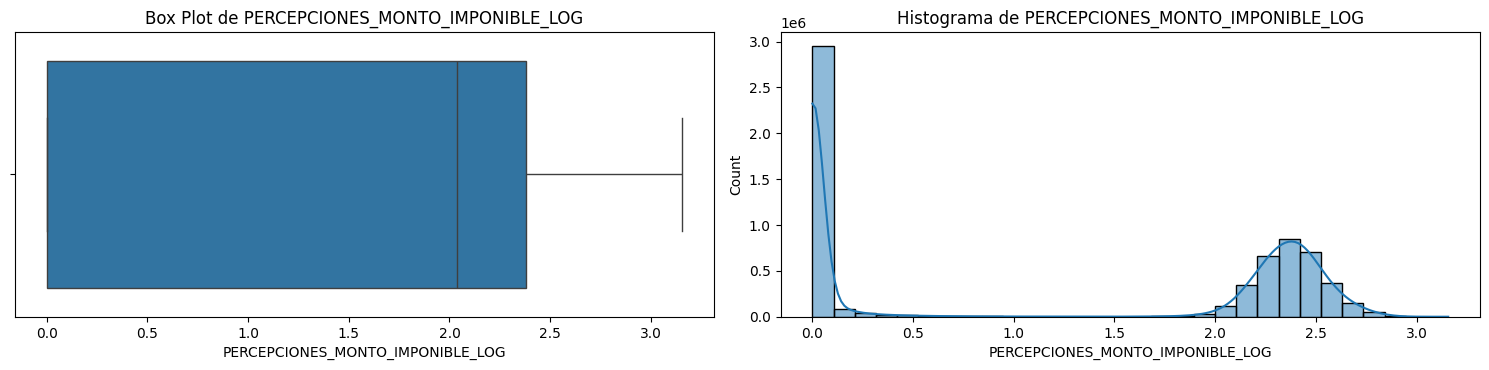

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Suponiendo que dataset_work_6 es tu DataFrame y que estás interesado en la columna EMPLEADOS

# Configurar el tamaño de la figura para contener todos los gráficos
plt.figure(figsize=(15, 10))

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2, 3)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_3['PERCEPCIONES_MONTO_IMPONIBLE_LOG'])
plt.title('Box Plot de PERCEPCIONES_MONTO_IMPONIBLE_LOG')

# Crear el histograma
plt.subplot(3, 2, 4)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_3['PERCEPCIONES_MONTO_IMPONIBLE_LOG'], bins=30, kde=True)
plt.title('Histograma de PERCEPCIONES_MONTO_IMPONIBLE_LOG')


# Ajustar el espaciado para que los gráficos no se superpongan
plt.tight_layout()

# Mostrar todos los gráficos
plt.show()

In [21]:
# Lista de variables numéricas a analizar
variables = ['PERCEPCIONES_MONTO_IMPONIBLE_LOG']
outliers_summary = {}

# Calcular outliers usando IQR para cada variable
for variable in variables:
    Q1 = dataset_work_3[variable].quantile(0.25)
    Q3 = dataset_work_3[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar outliers
    outliers = dataset_work_3[(dataset_work_3[variable] < lower_bound) | (dataset_work_3[variable] > upper_bound)]
    
    # Guardar resultados en un diccionario
    outliers_summary[variable] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Number of Outliers': len(outliers)
    }

# Convertir el resumen de outliers en un DataFrame para una mejor visualización
outliers_summary_dataset_work_3 = pd.DataFrame(outliers_summary).T

print(outliers_summary_dataset_work_3)

                                  Lower Bound  Number of Outliers  Upper Bound
PERCEPCIONES_MONTO_IMPONIBLE_LOG    -3.569067                 0.0     5.948445


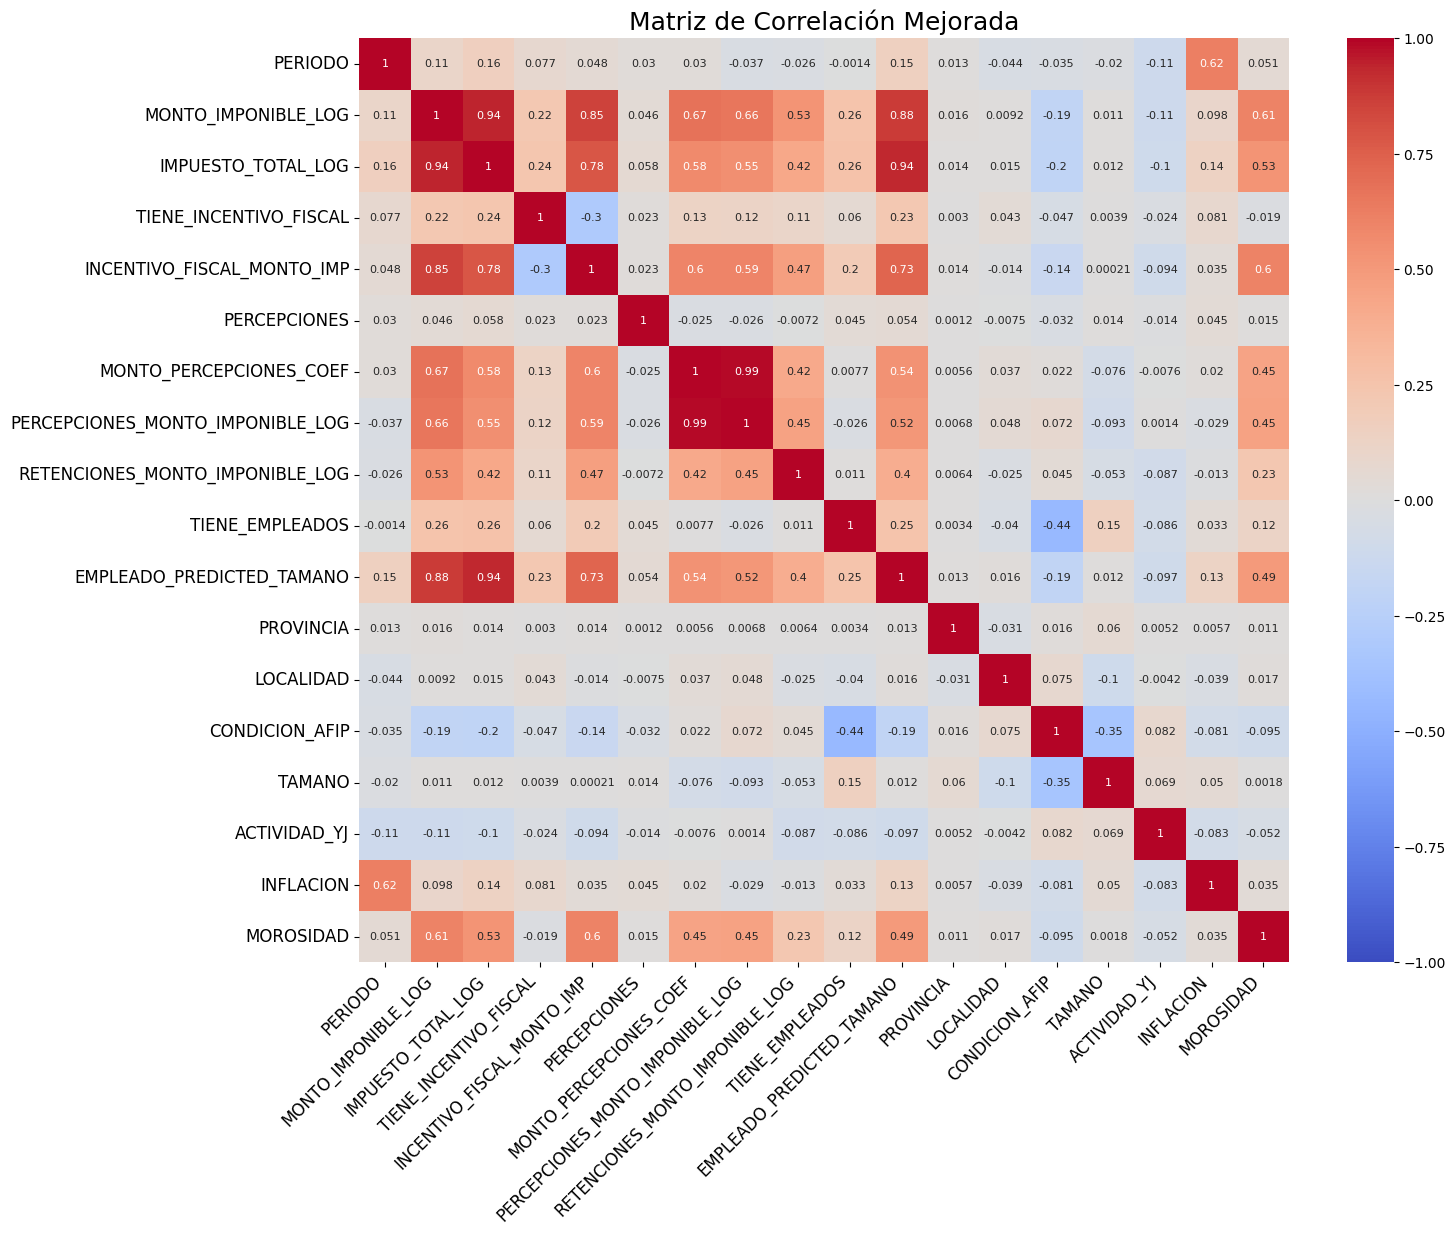

In [22]:
# Calculamos la matriz de correlación
correlation_matrix = dataset_work_3.corr()

# Ajustamos el tamaño de la figura y el tamaño de los números
plt.figure(figsize=(15, 12))  # Aumentamos el tamaño del gráfico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8})  # Ajustamos el tamaño de las anotaciones
plt.title('Matriz de Correlación Mejorada', fontsize=18)  # Título más grande
plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotamos y ajustamos las etiquetas del eje X
plt.yticks(fontsize=12)  # Ajustamos las etiquetas del eje Y
plt.show()

### Resguardamos el DataSet

Resguardamos el dataset resultante en un nuevo archivo para poder seguir procesandolo.

In [23]:
import pandas as pd

# Especifica el nombre del archivo CSV donde se guardarán los datos
output_file = 'D:\DataSet\dataset_work_8.csv'


# Guarda el DataFrame en un archivo CSV
dataset_work_3.to_csv(output_file, index=False, encoding='utf-8')

# Mensaje de confirmación
print(f'DataFrame guardado en {output_file}')

DataFrame guardado en D:\DataSet\dataset_work_8.csv
